$$\Huge \text{RAPORT}$$
$$\huge \text{LISTA 1}$$
$$\large \text{Autorzy: Katarzyna Rudzińska, Jagoda Płócienniczak}$$

PYTANIA OD K: zernikj na opisz i wnioski z zad. 10

In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import binomial
from scipy.stats import beta, binom, binomtest, multinomial, skew
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.proportion import proportion_confint, proportions_ztest

import plot_likert


W niniejszym raporcie przedstawiono analizę odpowiedzi z ankiety oceniającej skuteczność programów szkoleniowych dla pracowników pewnej firmy technologicznej. Analiza została przeprowadzona na podstawie zadań podzielonych na V części, a uzyskane wyniki wraz z ich interpretacją zaprezentowano w dalszej części raportu.

## CZĘŚĆ I

### ZADANIE 1

#### ZADANIE 1.1
    Wczytaj dane i przygotuj je do analizy. Zadbaj o odpowiednie typy zmiennych, zweryfikuj czy przyjmują wartości zgodne z powyższym opisem, zbadaj czy nie występują braki w danych.

Na etapie wczytywania danych zastosowano kodowanie *Windows-1250*, co umożliwiło poprawne odczytanie polskich znaków.

In [278]:
data = pd.read_csv('ankieta.csv', encoding='Windows-1250', sep=';')
data.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK
0,IT,2,Nie,1,-2,1,M,64
1,IT,2,Nie,0,-2,-2,M,67
2,IT,2,Nie,1,2,2,M,65
3,IT,2,Nie,-1,-2,-2,K,68
4,IT,3,Tak,1,2,-1,K,65


Następnie sprawdzono, czy w zestawie danych występują braki. Okazało się, że dane są kompletne.

In [279]:
data.isnull().sum()

DZIAŁ       0
STAŻ        0
CZY_KIER    0
PYT_1       0
PYT_2       0
PYT_3       0
PŁEĆ        0
WIEK        0
dtype: int64

Zweryfikowano typy danych w zbiorze. Zmiennym 'DZIAŁ', 'CZY_KIER' oraz 'PŁEĆ', które pierwotnie zaklasyfikowano jako typ *object*, przypisano typ *category*, co w dalszej części pozwoli na bardziej efektywne operacje. Pozostałe zmienne - 'STAŻ', 'PYT_1', 'PYT_2', 'PYT_3' oraz 'WIEK' - zostały prawidłowo zaklasyfikowane jako typ *int64*.

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [281]:
data['DZIAŁ'] = data['DZIAŁ'].astype("category")
data['CZY_KIER'] = data['CZY_KIER'].astype("category")
data['PŁEĆ'] = data['PŁEĆ'].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DZIAŁ     200 non-null    category
 1   STAŻ      200 non-null    int64   
 2   CZY_KIER  200 non-null    category
 3   PYT_1     200 non-null    int64   
 4   PYT_2     200 non-null    int64   
 5   PYT_3     200 non-null    int64   
 6   PŁEĆ      200 non-null    category
 7   WIEK      200 non-null    int64   
dtypes: category(3), int64(5)
memory usage: 9.0 KB


W ostatnim kroku tej części analizy sprawdzono zakresy przyjmowanych wartości. Wszystkie dane są zgodne z teoretycznym opisem zmiennych, co potwierdzają tablice liczności przedstawione poniżej jak i w *zadaniu 1.3*. Ze względu na dużą liczbę unikalnych wartości zmiennej 'WIEK' ograniczono się do analizy wartości minimalnej i maksymalnej. Uzyskany zakres (25–70 lat) mieści się w granicach uznawanych za rozsądne, co nie wzbudziło zastrzeżeń co do jakości danych.

In [282]:
variables = ["PYT_1", "PYT_2", "PYT_3"]
for var in variables:
    print(data[var].value_counts())
    print('\n')

PYT_1
 1    100
 0     40
 2     29
-1     17
-2     14
Name: count, dtype: int64


PYT_2
 2    104
-2     74
-1     20
 1      2
Name: count, dtype: int64


PYT_3
 2    86
-2    52
 1    32
-1    30
Name: count, dtype: int64




In [283]:
data['WIEK'].apply(type).value_counts()

WIEK
<class 'int'>    200
Name: count, dtype: int64

In [284]:
print('Najmłodszy pracownik: ',np.min(data['WIEK']))
print('Najstarszy pracownik: ',np.max(data['WIEK']))

Najmłodszy pracownik:  25
Najstarszy pracownik:  70


#### ZADANIE 1.2
    Utwórz zmienną WIEK_KAT przeprowadzając kategoryzację zmiennej WIEK korzystając z następujących przedziałów: do 35 lat, między 36 a 45 lat, między 46 a 55 lat, powyżej 55 lat.


Na podstawie zmiennej *WIEK* utworzono nową zmienną *WIEK_KAT*, kategoryzującą respondentów zgodnie z wytycznymi zadania. W tym celu zastosowano funkcję *categorize_age*, która przypisuje każdą osobę do jednej z czterech zdefiniowanych kategorii wiekowych.

In [285]:
def categorize_age(age):
    if age <= 35:
        return "<=35"
    elif 36 <= age <= 45:
        return "36-45"
    elif 46 <= age <= 55:
        return "46-55"
    else:
        return ">55"

data["WIEK_KAT"] = data["WIEK"].apply(categorize_age)
data['WIEK_KAT'] = data['WIEK_KAT'].astype("category")

In [286]:
data.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT
0,IT,2,Nie,1,-2,1,M,64,>55
1,IT,2,Nie,0,-2,-2,M,67,>55
2,IT,2,Nie,1,2,2,M,65,>55
3,IT,2,Nie,-1,-2,-2,K,68,>55
4,IT,3,Tak,1,2,-1,K,65,>55


#### ZADANIE 1.3
    Sporządź tablice liczności dla zmiennych: DZIAŁ, STAŻ, CZY_KIER, PŁEĆ, WIEK_KAT. Sformułuj wnioski.

- tablica liczności: *DZIAŁ*

In [287]:
data['DZIAŁ'].value_counts()

DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

Jak się okazuje, najwięcej osób pracuje w dziale PD (98 pracowników), co sugeruje, że jest to kluczowy dział w firmie. Działy MK, HR i IT są mniejsze, liczą odpowiednio 45, 31 i 26 pracowników. Mniejsza liczba pracowników w tych działach może wynikać z węższego zakresu obowiązków, ale również z bardziej wyspecjalizowanej roli, jaką pełnią. 

- tablica liczności: *STAŻ*

In [288]:
data['STAŻ'].value_counts()

STAŻ
2    140
1     41
3     19
Name: count, dtype: int64

W firmie zatrudnionych jest wielu pracowników o młodszym stażu (140 osób), którzy posiadają już pewne doświadczenie – pracują dłużej niż rok, ale krócej niż 3 lata. Firma prawdopodobnie przyciąga również nowych pracowników, z których 41 osób ma staż poniżej 1 roku. Jednakże, firma może mieć trudności z utrzymywaniem pracowników na dłużej, ponieważ tylko 19 osób pracuje tam ponad 3 lata.

- tablica liczności: *CZY_KIER*

In [289]:
data['CZY_KIER'].value_counts()

CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

W firmie stanowisko kierownicze pełni 27 osób, co wydaje się być adekwatną liczbą w porównaniu do całkowitej liczby zatrudnionych pracowników. W teorii każda osoba na stanowisku kierowniczym ma średnio pod sobą około 9 pracowników, co może sprzyjać efektywnej pracy w zespołach i umożliwiać skuteczne zarządzanie.

- tablica liczności: *PŁEĆ*

In [290]:
data['PŁEĆ'].value_counts()

PŁEĆ
M    129
K     71
Name: count, dtype: int64

W firmie dominują mężczyźni (129 osób), podczas gdy liczba kobiet zatrudnionych wynosi 71. Taki rozkład płci jest często typowy dla firm z branży technologicznej, gdzie mężczyźni w większości przypadków stanowią większy odsetek pracowników.

- tablica liczności: *WIEK_KAT*

In [291]:
data['WIEK_KAT'].value_counts()

WIEK_KAT
36-45    104
46-55     45
<=35      26
>55       25
Name: count, dtype: int64

Największa grupa pracowników mieści się w przedziale wiekowym $36-45$ lat ($104$ osoby), co sugeruje, że firma zatrudnia wielu pracowników z dużym doświadczeniem zawodowym. Pracownicy młodsi ($\leq$ 35 lat) oraz w średnim wieku (46-55 lat) stanowią mniejszy odsetek zatrudnionych, odpowiednio 26 i 45 osób. Najmniej liczną grupę stanowią osoby powyżej 55. roku życia (25 osób), co może sugerować stopniowe przechodzenie tych pracowników na emeryturę lub preferencje firmy dotyczące zatrudniania młodszych pracowników.

#### ZADANIE 1.4
     Sporządź wykresy kołowe oraz wykresy słupkowe dla zmiennych: PYT_1 oraz PYT_2. Sformułuj wnioski.

In [292]:
pyt1_value = data["PYT_1"].value_counts()
pyt2_value = data["PYT_2"].value_counts()

In [293]:
response_labels_pyt1 = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
    0: "Nie mam zdania",
    1: "Zgadzam się",
    2: "Zdecydowanie się zgadzam"
}

response_labels_pyt2 = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
    1: "Zgadzam się",
    2: "Zdecydowanie się zgadzam"
}
pyt1_labels = [response_labels_pyt1[val] for val in pyt1_value.index]
pyt2_labels = [response_labels_pyt2[val] for val in pyt2_value.index]

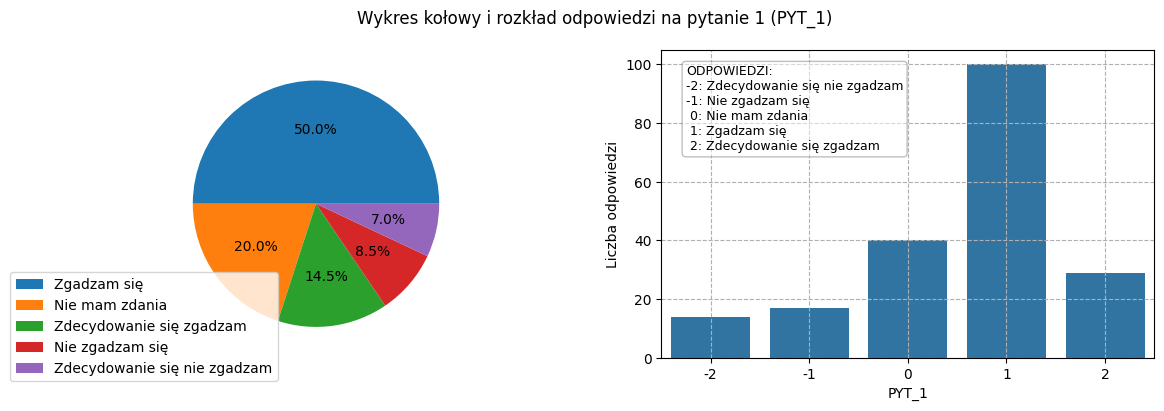

In [294]:
plt.figure(figsize=(14, 4))
plt.suptitle('Wykres kołowy i rozkład odpowiedzi na pytanie 1 (PYT_1)')

plt.subplot(1, 2, 1)
plt.pie(pyt1_value, autopct="%.1f%%")
plt.legend(labels=pyt1_labels,  bbox_to_anchor=(0.4, 0.3))

plt.subplot(1, 2, 2)
sns.countplot(x="PYT_1", data=data)
plt.ylabel('Liczba odpowiedzi')
param_text = "ODPOWIEDZI:\n-2: Zdecydowanie się nie zgadzam\n-1: Nie zgadzam się\n 0: Nie mam zdania\n 1: Zgadzam się\n 2: Zdecydowanie się zgadzam"
plt.text(0.05, 0.95, param_text,
         transform=plt.gca().transAxes,  
         fontsize=9,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
plt.grid(True, linestyle='--')


plt.show()

- PYTANIE 1: "Jak bardzo zgadzasz się ze stwierdzeniem, że firma zapewnia odpowiednie wsparcie i materiały umożliwiające skuteczne wykorzystanie w praktyce wiedzy zdobytej w trakcie szkoleń?"

Na podstawie wyników przedstawionych na wykresie kołowym oraz wykresie słupkowym, możemy zauważyć, że dominująca część ankietowanych pozytywnie ocenia wsparcie firmy w kontekście wykorzystania wiedzy zdobytej podczas szkoleń. Aż 64,5% respondentów (w sumie 129 osób) odpowiedziało twierdząco, wybierając odpowiedzi „Zdecydowanie się zgadzam” lub „Zgadzam się”. To sugeruje, że większość pracowników uważa, iż firma rzeczywiście zapewnia odpowiednie wsparcie w skuteczne wdrożenie nowo nabytej wiedzy.

40 osób (około 20%) odpowiedziało „Nie mam zdania” - taka odpowiedź może sugerować, że firma nie w pełni komunikuje dostępne zasoby lub nie wszystkie osoby miały okazję w pełni z nich skorzystać.

Co więcej, 31 respondentów (14 osób - „Zdecydowanie się nie zgadzam”, 17 osób - „Nie zgadzam się”) wyraziło negatywne opinie na temat wsparcia po szkoleniu (około 15,5% wszystkich ankietowanych). Mimo, iż jest to mniejszość głosów, wskazuje to jednak na możliwe problemy, które mogą dotyczyć jakości wsparcia, dostępności materiałów czy sposobu ich wykorzystywania. Może to sugerować, że firma powinna zwrócić szczególną uwagę na te osoby, by zidentyfikować obszary, w których wsparcie może wymagać poprawy, lub na które grupy pracowników należy skierować większą pomoc.

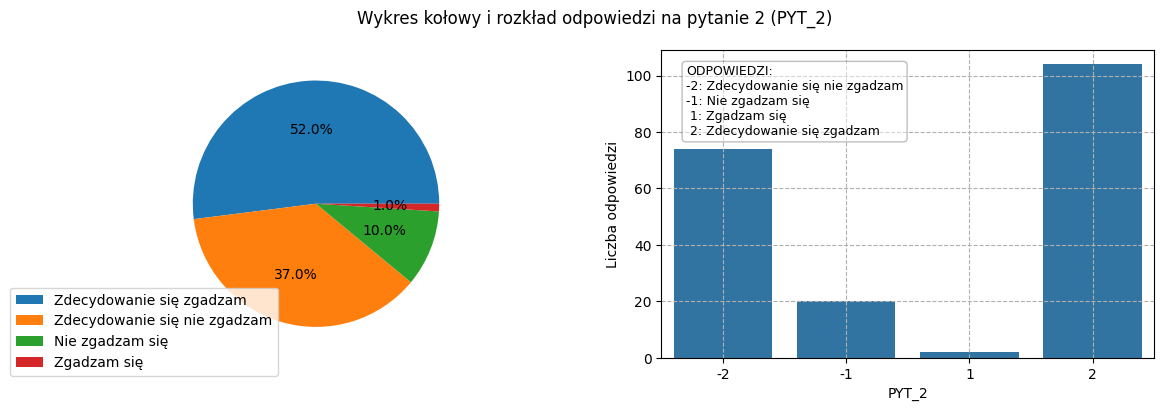

In [295]:
plt.figure(figsize=(14, 4))
plt.suptitle('Wykres kołowy i rozkład odpowiedzi na pytanie 2 (PYT_2)')

plt.subplot(1, 2, 1)
plt.pie(pyt2_value, autopct="%.1f%%")
plt.legend(labels=pyt2_labels,  bbox_to_anchor=(0.4, 0.25))

plt.subplot(1, 2, 2)
sns.countplot(x="PYT_2", data=data)
plt.ylabel('Liczba odpowiedzi')
param_text = "ODPOWIEDZI:\n-2: Zdecydowanie się nie zgadzam\n-1: Nie zgadzam się\n 1: Zgadzam się\n 2: Zdecydowanie się zgadzam"
plt.text(0.05, 0.95, param_text,
         transform=plt.gca().transAxes,  
         fontsize=9,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.5))
plt.grid(True, linestyle='--')

plt.show()

- PYTANIE 2: "Jak bardzo zgadzasz się ze stwierdzeniem, że firma oferuje szkolenia dostosowane do twoich potrzeb, wspierając twój rozwój zawodowy i szanse na awans?"

W przypadku pytania dotyczącego oferty szkoleniowej, odpowiedzi wskazują na podzielone opinie wśród pracowników. 52% ankietowanych pozytywnie ocenia dostosowanie szkoleń do swoich potrzeb, co sugeruje, że część pracowników uważa, iż firma skutecznie wspiera ich rozwój zawodowy oraz oferuje szkolenia sprzyjające awansom. Jednakże, warto zwrócić uwagę na wysoki odsetek negatywnych odpowiedzi, który wynosi 47%.

Taka rozbieżność, gdzie niemal połowa pracowników wyraża niezadowolenie, sugeruje istotne problemy związane z jakością i dopasowaniem oferty szkoleniowej do indywidualnych potrzeb pracowników. Wskazuje to, że firma powinna przeanalizować swoje podejście do szkoleń i dostosować je lepiej do oczekiwań oraz potrzeb różnych grup pracowników. 

#### ZADANIE 1.5
    Sporządź tablice wielodzielcze dla par zmiennych: PYT_1 i DZIAŁ, PYT_1 i STAŻ, PYT_1 i CZY_KIER, PYT_1 i PŁEĆ oraz PYT_1 i WIEK_KAT. Sformułuj wnioski.

In [296]:
crosstab_P1D = pd.crosstab(data['PYT_1'], data['DZIAŁ'], margins = False) 
crosstab_P1S = pd.crosstab(data['PYT_1'], data['STAŻ'], margins = False) 
crosstab_P1CzK = pd.crosstab(data['PYT_1'], data['CZY_KIER'], margins = False) 
crosstab_P1P = pd.crosstab(data['PYT_1'], data['PŁEĆ'], margins = False) 
crosstab_P1WK = pd.crosstab(data['PYT_1'], data['WIEK_KAT'], margins = False) 

a) PYT_1 i DZIAŁ

In [297]:
crosstab_P1D

DZIAŁ,HR,IT,MK,PD
PYT_1,,,,
-2,2,0,3,9
-1,2,2,3,10
0,5,4,14,17
1,19,15,15,51
2,3,5,10,11


Pracownicy działów HR, IT i MK w większości pozytywnie oceniają wsparcie firmy w kontekście skutecznego wykorzystania w praktyce wiedzy zdobytej w trakcie szkoleń. Niemniej jednak, warto zwrócić szczególną uwagę na dział MK, gdzie zauważalny odsetek osób (14) wybrało odpowiedź "Nie mam zdania". Sugeruje to, że część pracowników może nie być w pełni świadoma dostępnych szkoleń lub nie miała okazji skorzystać z nich w pełni – warto więc upewnić się w tej kwestii.

Choć dział PD udzielił najwyższego odsetka odpowiedzi pozytywnych spośród wszystkich działów, również w tym przypadku warto zauważyć stosunkowo dużą liczbę odpowiedzi "Nie mam zdania" (17 osób) oraz odpowiedzi negatywnych (19 osób). To może sugerować, że mimo ogólnej pozytywnej oceny, część pracowników z tego działu nie jest do końca przekonana o skuteczności szkoleń, co warto uwzględnić przy kolejnym ich planowaniu.

b) PYT_1 i STAŻ

In [298]:
crosstab_P1S

STAŻ,1,2,3
PYT_1,,,
-2,5,5,4
-1,6,10,1
0,8,26,6
1,19,75,6
2,3,24,2


Osoby z stażem 2 (od roku do trzech lat) mają zdecydowanie większą tendencję do pozytywnego oceniania wsparcia firmy w wykorzystaniu wiedzy zdobytej na szkoleniu. Aż 99 osób uznało, że firma skutecznie wspiera ich w praktycznym zastosowaniu szkolenia. Warto jednak zauważyć, że 26 osób z tej grupy miało opinię neutralną, co sugeruje, że część pracowników wciąż nie jest do końca przekonana o efektywności tego wsparcia.

Z kolei osoby z krótkim stażem (poniżej roku) oraz osoby z długim stażem (powyżej 3 lat) mają podzielone opinie. Wśród nich odpowiedzi pozytywne i negatywne występują w podobnych proporcjach, co wskazuje na różnorodność doświadczeń związanych z wdrażaniem zdobytej wiedzy w praktyce.

c) PYT_1 i CZY_KIER

In [299]:
crosstab_P1CzK

CZY_KIER,Nie,Tak
PYT_1,,
-2,10,4
-1,14,3
0,34,6
1,88,12
2,27,2


Osoby, które nie pełnią funkcji kierowniczych (CZY_KIER = „Nie”), wykazują zdecydowanie wyższy odsetek odpowiedzi pozytywnych. W tej grupie 115 osób zgodziło się ze stwierdzeniem, że firma skutecznie wspiera ich w wykorzystaniu wiedzy zdobytej podczas szkoleń, co wskazuje na dużą satysfakcję z oferowanych programów rozwojowych.

Natomiast wśród osób pełniących funkcje kierownicze odpowiedzi są bardziej zróżnicowane. Choć większość kierowników wyraziła pozytywne opinie, różnica między odpowiedziami pozytywnymi a negatywnymi nie jest na tyle duża, aby uznać ją za znaczącą. Może to sugerować, że osoby na stanowiskach kierowniczych mają bardziej specyficzne potrzeby szkoleniowe, które nie zawsze są w pełni zaspokajane przez oferowane programy. 

d) PYT_1 i PŁEĆ

In [300]:
crosstab_P1P

PŁEĆ,K,M
PYT_1,,
-2,3,11
-1,7,10
0,14,26
1,36,64
2,11,18


Porównując odsetek odpowiedzi między kobietami a mężczyznami, żadna z grup nie wykazuje znaczącego niezadowolenia związanego ze szkoleniami. Zarówno kobiety, jak i mężczyźni w dużej mierze wyrażają zadowolenie z wiedzy zdobytej na szkoleniach oraz jej zastosowania w praktyce. To sugeruje, że oferowane szkolenia są neutralne płciowo i odpowiadają na potrzeby wszystkich pracowników, niezależnie od płci.

e) PYT_1 i WIEK_KAT

In [301]:
crosstab_P1WK

WIEK_KAT,36-45,46-55,<=35,>55
PYT_1,,,,
-2,11,2,1,0
-1,7,1,6,3
0,24,5,3,8
1,50,25,13,12
2,12,12,3,2


Analizując odpowiedzi, widać, że firma dość dobrze zapewnia wsparcie w skutecznym wykorzystywaniu wiedzy zdobytej na szkoleniach, niezależnie od wieku pracowników. Jednak jedynym wyjątkiem wydaje się być grupa wiekowa 36-45 lat, gdzie w porównaniu do innych grup pojawia się większy odsetek odpowiedzi negatywnych oraz odpowiedzi „Nie mam zdania”. To może sugerować, że ta grupa pracowników może mieć specyficzne potrzeby lub oczekiwania wobec szkoleń, które nie są w pełni zaspokajane przez oferowane programy. Należy więc rozważyć, czy firma dostosowuje swoje oferty szkoleniowe w wystarczający sposób do potrzeb tej grupy wiekowej.

#### ZADANIE 1.6
    Sporządź tablicę wielodzielczą dla pary zmiennych: PYT_2 i PYT_3. Sformułuj wnioski.

- PYTANIE 3 (zadano ponownie po kilku tygodniach): "Jak bardzo zgadzasz się ze stwierdzeniem, że firma oferuje szkolenia dostosowane do twoich potrzeb, wspierając twój rozwój zawodowy i szanse na awans?"  

In [302]:
crosstab_P2P3 = pd.crosstab(data['PYT_2'], data['PYT_3'], margins = False) 
crosstab_P2P3

PYT_3,-2,-1,1,2
PYT_2,,,,
-2,49,16,5,4
-1,3,6,10,1
1,0,0,2,0
2,0,8,15,81


Po zakończeniu dodatkowego cyklu szkoleń, dostosowanego do potrzeb różnych grup pracowników, ponownie zapytano jak oceniają jakość oferty szkoleniowej.

Wyniki nie wskazują na znaczącą poprawę. Spośród wszystkich respondentów, 62 osoby zmieniły swoje odpowiedzi - jednak zmiany te nie były jednoznacznie pozytywne. Co prawda 36 osób oceniło szkolenia lepiej niż wcześniej, jednak aż 16 z nich nadal wyraziło opinię negatywną (zmieniając odpowiedź z „Zdecydowanie się nie zgadzam” na „Nie zgadzam się”). Z kolei 26 osób oceniło szkolenia gorzej niż w pierwszym badaniu.

Co istotne, aż 138 respondentów nie zmieniło swojej oceny – w tej grupie znajdują się 83 pozytywne opinie, ale również 55 negatywnych.

Podsumowując, pomimo ponownego przeprowadzenia szkoleń, ich jakość nie uległa wyraźnej poprawie, a potrzeby pracowników pozostają w dużej mierze niezaspokojone.

#### ZADANIE 1.7
     Utwórz zmienną CZY_ZADOW na podstawie zmiennej PYT_2 łącząc kategorie "nie zgadzam się" i "zdecydowanie się nie zgadzam" oraz "zgadzam się" i "zdecydowanie się zgadzam".

W tej części dodano nową kolumnę o nazwie *CZY_ZADOW*, która wskazuje poziom zadowolenia respondentów w zależności od ich odpowiedzi na pytanie PYT_2. Jeśli ankietowany odpowiedział na PYT_2 „Zdecydowanie się zgadzam” lub „Zgadzam się”, przypisano mu wartość „TAK”, co oznacza pozytywną ocenę wsparcia firmy. W przeciwnym przypadku, jeśli odpowiedź była negatywna („Nie zgadzam się” lub „Zdecydowanie się nie zgadzam”), przypisano mu wartość „NIE”, co wskazuje na brak zadowolenia względem wsparcia oferowanego przez firmę.

In [303]:
def is_satisfied(satisfaction_lvl):
    if satisfaction_lvl == -2 or satisfaction_lvl == -1:
        return 'NIE'
    else:
        return 'TAK'

data["CZY_ZADOW"] = data["PYT_2"].apply(is_satisfied)
data["CZY_ZADOW"] = data["CZY_ZADOW"].astype("category")

In [304]:
data.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
0,IT,2,Nie,1,-2,1,M,64,>55,NIE
1,IT,2,Nie,0,-2,-2,M,67,>55,NIE
2,IT,2,Nie,1,2,2,M,65,>55,TAK
3,IT,2,Nie,-1,-2,-2,K,68,>55,NIE
4,IT,3,Tak,1,2,-1,K,65,>55,TAK


#### ZADANIE 1.8
    Sporządź wykresy mozaikowe odpowiadające parom zmiennych: CZY_ZADOW i DZIAŁ, CZY_ZADOW i STAŻ, CZY_ZADOW i CZY_KIER, CZY_ZADOW i PŁEĆ oraz CZY_ZADOW i WIEK_KAT. Czy na podstawie uzyskanych wykresów można postawić pewne hipotezy dotyczące relacji między powyższymi zmiennymi? Spróbuj sformułować kilka takich hipotez.

a) CZY_ZADOW i DZIAŁ

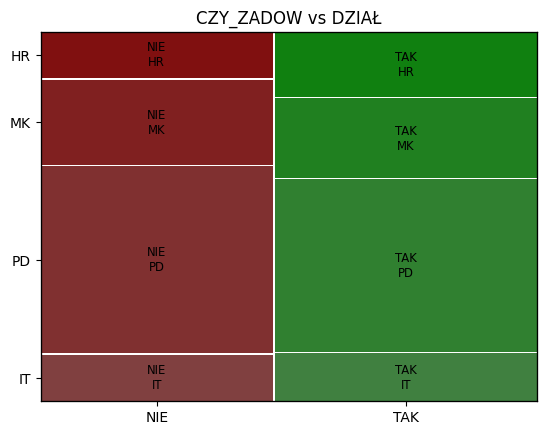

In [305]:
mosaic(data, ['CZY_ZADOW', 'DZIAŁ'], title='CZY_ZADOW vs DZIAŁ')
plt.show()

- HIPOTEZA: Oferowane szkolenia nie odpowiadają w pełni na potrzeby pracowników w żadnym z działów, co znajduje odzwierciedlenie w niemal równomiernym podziale opinii pozytywnych i negatywnych (odpowiedzi „TAK” i „NIE”) wśród wszystkich badanych działów.

b) CZY_ZADOW i STAŻ

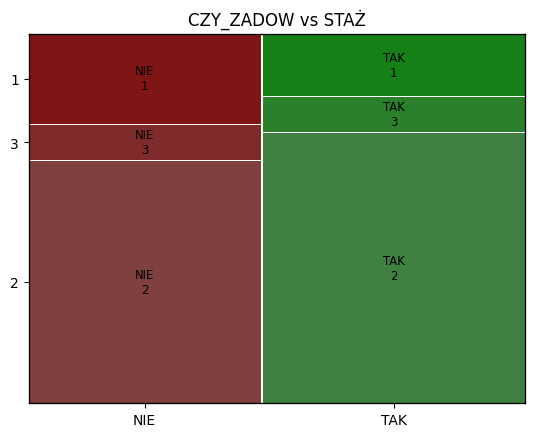

In [306]:
mosaic(data, ['CZY_ZADOW', 'STAŻ'], title='CZY_ZADOW vs STAŻ')
plt.show()

- HIPOTEZA: Pracownicy z najkrótszym stażem pracy są bardziej zadowoleni z oferowanych szkoleń i wsparcia, ponieważ są to dla nich nowe doświadczenia (gdzie np. osoby z dłuższym stażem mogą być bardziej wymagające lub mieć wyższe oczekiwania).

c) CZY_ZADOW i CZY_KIER

Ze względu na identyczne zestawy odpowiedzi w zmiennych *CZY_ZADOW* i *CZY_KIER*, warto doprecyzować interpretację wykresu: oś X przedstawia odpowiedzi na pytanie dotyczące zmiennej *CZY_ZADOW*, natomiast oś Y odnosi się do zmiennej *CZY_KIER*.

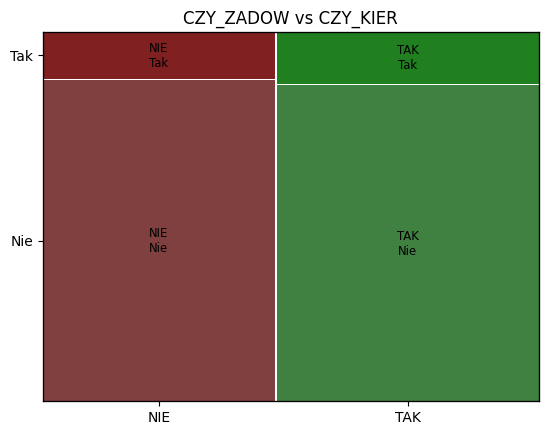

In [307]:
mosaic(data, ['CZY_ZADOW', 'CZY_KIER'], title='CZY_ZADOW vs CZY_KIER')
plt.show()

- HIPOTEZA: Osoby zajmujące stanowiska kierownicze mogą być bardziej krytyczne wobec jakości i dopasowania oferowanych szkoleń w porównaniu do pracowników zajmujących niższe stanowiska.

d) CZY_ZADOW i PŁEĆ

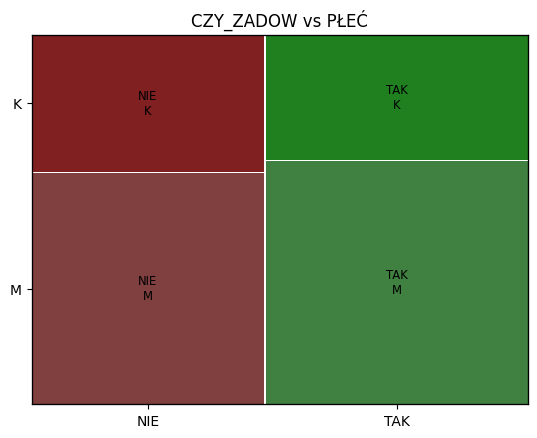

In [308]:
mosaic(data, ['CZY_ZADOW', 'PŁEĆ'], title='CZY_ZADOW vs PŁEĆ')
plt.show()

- HIPOTEZA: Mężczyźni i kobiety mają różne oczekiwania względem szkoleń i wsparcia firmy, co skutkuje różnicami w poziomie zadowolenia.

e) CZY_ZADOW i WIEK_KAT

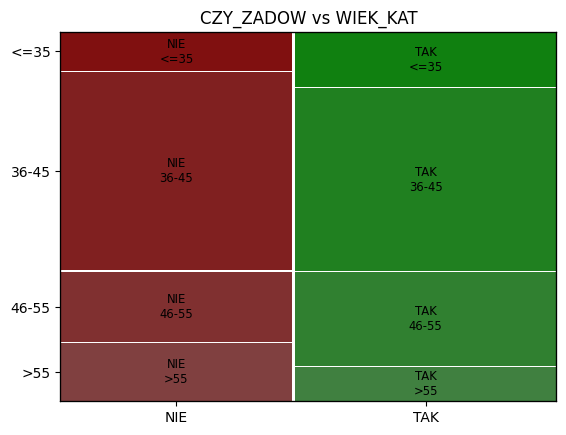

In [309]:
mosaic(data, ['CZY_ZADOW', 'WIEK_KAT'], title='CZY_ZADOW vs WIEK_KAT')
plt.show()

- HIPOTEZA: Starsi pracownicy (w wieku starszym niż 55 lat) są najmniej zadowoleni z oferty firmy odnośnie awansów i wsparcia w rozwoju kariery.

## CZĘŚĆ II

### ZADANIE 2 
    Zilustruj odpowiedzi na pytanie "Jak bardzo zgadzasz się ze stwierdzeniem, że firma pozwala na (...)?" (zmienna PYT_1) w całej badanej grupie oraz w podgrupach ze względu na zmienną CZY_KIER. W tym celu możesz zaproponować własne metody wizualizacji lub zapozać się z biblioteką likert i dostępnymi tam funkcjami summary oraz plot (jeśli korzystarz z R) oraz z biblioteką Altair lub plot-likert (jeśli korzystarz z Pythona).

Poniższy wykres przedstawia zestawienie odpowiedzi na pytanie PYT_1 z podziałem na grupy według zmiennej *CZY_KIER*. Wyniki zostały wyrażone w procentach, dlatego należy mieć na uwadze, że grupa osób pełniących funkcje kierownicze stanowi wyraźną mniejszość — 27 osób wobec 173 pracowników niekierujących zespołami.

Od strony technicznej: Ostrzeżenia typu *FutureWarning*, które pojawiają się podczas generowania wykresu, odnoszą się do przestarzałego użycia funkcji *applymap* oraz indeksowania pozycyjnego w kodzie źródłowym biblioteki plot_likert. Nie są one wynikiem błędów w implementacji analizy, lecz informacją o przyszłych zmianach w działaniu biblioteki. Dodatkowo, komunikat *UserWarning* informuje (jak wspomniano wcześniej), że liczba odpowiedzi na poszczególne pytania (w tym przypadku - *CZY_KIER*) może się znacząco różnić, co może wpłynąć na porównywalność procentowych wyników między pytaniami.

C:\Users\ploci\AppData\Roaming\Python\Python312\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
C:\Users\ploci\AppData\Roaming\Python\Python312\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
C:\Users\ploci\AppData\Roaming\Python\Python312\site-packages\plot_likert\plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the

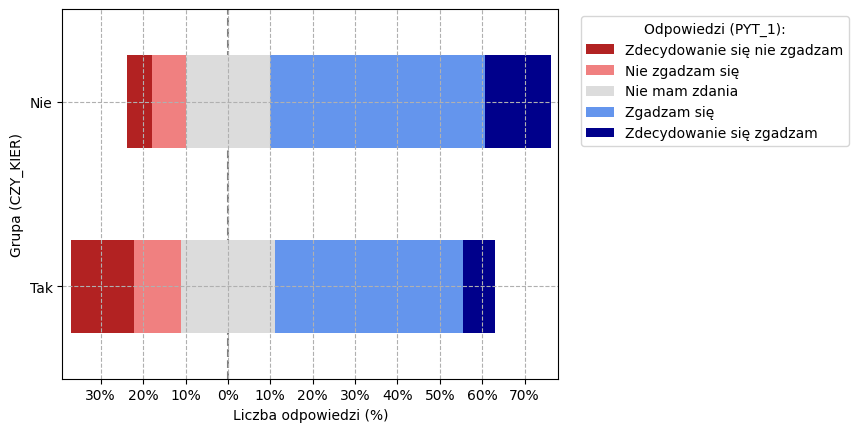

In [310]:
myscale_p1 = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
     0: "Nie mam zdania",
     1: "Zgadzam się",
     2: "Zdecydowanie się zgadzam"
}

data["PYT_1_LABEL"] = data["PYT_1"].map(myscale_p1)
data["PYT_1_LABEL"] = data["PYT_1_LABEL"].astype("category")
df_likert = data.pivot(columns="CZY_KIER", values="PYT_1_LABEL")
myscale_p1_labels = list(myscale_p1.values())


plot_likert.plot_likert(df_likert, myscale_p1_labels, plot_percentage=True)
plt.ylabel('Grupa (CZY_KIER)')
plt.xlabel('Liczba odpowiedzi (%)')
plt.legend(title='Odpowiedzi (PYT_1):', bbox_to_anchor=(1.6, 1))
plt.grid(True, linestyle = '--')
plt.show()


Na podstawie wykresu można zauważyć wyraźne różnice w rozkładzie opinii między pracownikami pełniącymi funkcje kierownicze a pozostałymi. W grupie osób, które nie zajmują stanowisk kierowniczych (stanowiących zdecydowaną większość – 173 osoby), dominują odpowiedzi pozytywne, które stanowią około 60% wszystkich wypowiedzi. Odpowiedzi neutralne oscylują wokół 20%, natomiast odpowiedzi negatywne przekraczają 10%, ale nie przekraczają 15%. Taki rozkład wskazuje na ogólne zadowolenie w tej grupie, przy jednocześnie umiarkowanej liczbie głosów krytycznych.

Z kolei wśród osób pełniących funkcje kierownicze (co stanowi mniejszość badanych – 27 osób), pozytywne odpowiedzi stanowią około 50%, co jest wyraźnie niższym wynikiem niż wśród pozostałych pracowników. Odpowiedzi neutralne przekraczają 20%, natomiast odpowiedzi negatywne są zdecydowanie wyższe i wynoszą ponad 20% (prawdopodobnie bliżej nawet do  25%). Może to sugerować, że osoby na stanowiskach kierowniczych są bardziej krytyczne lub mają inne oczekiwania względem badanego obszaru.

Ze względu na znaczącą różnicę w liczności obu grup, należy ostrożnie interpretować wartości procentowe — szczególnie dla mniejszej grupy kierowników, w której każda odpowiedź ma większy wpływ na ogólny wynik. Niemniej jednak, obserwowane różnice mogą wskazywać na istotne zróżnicowanie doświadczeń i potrzeb pomiędzy grupami, co warto wziąć pod uwagę w dalszych działaniach organizacyjnych.

### ZADANIE 3
    Zapoznaj się z funkcją sample z biblioteki stats (w R) lub z funkcją random.choice z biblioteki numpy (w Pythonie). Przetestuj jej działanie dla różnych wartości argumentów wejściowych. Następnie wylosuj próbkę o liczności 10% wszystkich rekordów z pliku "ankieta.csv" w dwóch wersjach: ze zwracaniem oraz bez zwracania.

W pierwszej kolejności przetestujmy działanie funkcji *random.choice* dla różnych wartości argumentów wejściowych.

In [311]:
example_data = np.array([-10,-8,-6,-4,-2,0,2,4,6,8,10])
example_prob = np.array([0.1,0.05,0.2,0.02,0.03,0.3,0.025,0.025,0.05,0.1,0.1])

- Wersja: bez zwracania

In [312]:
example_without_replacement = np.random.choice(example_data, size=5, replace=False)
example_without_replacement

array([10,  2, -4, -8,  0])

- Wersja: ze zwracaniem, takie same prawdopodobieństwo wylosowania wszystkich wartości

In [313]:
example_with_replacement = np.random.choice(example_data, size=5, replace=True)
example_with_replacement

array([ -4, -10,   8,   2,  -4])

- Wersja: ze zwracaniem, różne prawdopodobieństwa wylosowania wartości

In [314]:
example_with_prob = np.random.choice(example_data, size=5, replace=True, p=example_prob)
example_with_prob

array([-10,  10,  -6,   6, -10])

Wylosujmy teraz próbkę o liczności 10% wszystkich rekordów z analizowanego do tej pory pliku 'ankieta.csv'

- Wersja: ze zwracaniem, takie same prawdopodobieństwo wylosowania wszystkich wartości

In [315]:
sample10_percent = int(0.1 * len(data))

sample_with_replacement = np.random.choice(data.index, size=sample10_percent, replace=True)
frame_with_replacement = data.loc[sample_with_replacement]
frame_with_replacement.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW,PYT_1_LABEL
64,PD,2,Tak,0,-2,-2,M,53,46-55,NIE,Nie mam zdania
38,PD,1,Nie,1,2,2,M,40,36-45,TAK,Zgadzam się
27,PD,1,Nie,1,2,2,M,26,<=35,TAK,Zgadzam się
97,PD,2,Nie,0,-2,-2,M,40,36-45,NIE,Nie mam zdania
70,PD,2,Nie,1,2,1,M,28,<=35,TAK,Zgadzam się


Sprawdźmy, czy w wyniku naszego losowania uzyskaliśmy dwie lub więcej takich samych próbek.

In [316]:
repeated_samples = pd.Series(sample_with_replacement).value_counts()
repeated_idx = repeated_samples[repeated_samples > 1].index
repeated = data.loc[repeated_idx]
repeated


,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW,PYT_1_LABEL


- Wersja: ze zwracaniem, różne prawdopodobieństwo wylosowania wartości

Np. stwierdzamy, że dział IT stanowi niewielki odsetek ogółu pracowników, co w przypadku prostego losowania mogłoby skutkować niedostateczną reprezentacją jego opinii w analizowanej próbce. Aby temu zapobiec, stosujemy losowanie ze zwracaniem z różnicowaniem wag (prawdopodobieństw) — odpowiedzi pracowników działu IT będą losowane pięciokrotnie częściej niż odpowiedzi pracowników innych działów.

In [348]:
weights = data["DZIAŁ"].apply(lambda x: 5 if x == "IT" else 1).astype(float)
probs = weights / weights.sum()

sample_with_prob = np.random.choice(data.index, size=sample10_percent, replace=True, p=probs.values)

frame_with_prob = data.loc[sample_with_prob]
frame_with_prob.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW,PYT_1_LABEL,CZY_ZADOW_2
77,PD,1,Nie,1,-1,2,K,39,36-45,NIE,Zgadzam się,TAK
190,HR,2,Nie,-1,-2,-2,M,64,>55,NIE,Nie zgadzam się,NIE
13,IT,2,Nie,1,2,2,K,53,46-55,TAK,Zgadzam się,TAK
22,IT,2,Nie,-1,-2,-2,K,60,>55,NIE,Nie zgadzam się,NIE
136,MK,2,Nie,2,2,2,K,41,36-45,TAK,Zdecydowanie się zgadzam,TAK


Sprawdźmy, czy w wyniku naszego losowania uzyskaliśmy dwie lub więcej takich samych próbek.

In [352]:
repeated_samples_with_prob = pd.Series(sample_with_prob).value_counts()
repeated_idx_with_prob = repeated_samples_with_prob[repeated_samples_with_prob > 1].index
repeated_with_prob = data.loc[repeated_idx_with_prob]
repeated_with_prob


,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW,PYT_1_LABEL,CZY_ZADOW_2
4,IT,3,Tak,1,2,-1,K,65,>55,TAK,Zgadzam się,NIE


- Wersja: bez zwracania

In [319]:
sample_without_replacement = np.random.choice(data.index, size=sample10_percent, replace=False)
frame_without_replacement = data.loc[sample_without_replacement]
frame_without_replacement.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW,PYT_1_LABEL
53,PD,1,Nie,0,-2,-2,M,41,36-45,NIE,Nie mam zdania
157,MK,2,Nie,0,-2,-2,M,63,>55,NIE,Nie mam zdania
183,HR,2,Nie,1,2,1,M,39,36-45,TAK,Zgadzam się
173,HR,2,Nie,1,2,1,M,36,36-45,TAK,Zgadzam się
169,HR,2,Nie,1,2,2,M,46,46-55,TAK,Zgadzam się


### ZADANIE 4
    Zaproponuj metodę symulowania zmiennych losowych z rozkładu dwumianowego. Napisz funkcję do generowania realizacji, a następnie zaprezentuj jej działanie porównując wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartości paramertów rozkładu: n i p.

In [320]:
def binomial_simulate(n, p, size):
    return np.random.binomial(n, p, size)

In [321]:
n_binomial = 10 
p_binomial = 0.3 
size_binomial = 10000  

binomial_sample = binomial_simulate(n_binomial, p_binomial, size_binomial)

Jak możemy zauważyć poniżej, zaproponowana metoda symulowania zmiennych losowych z rozkładu dwumianowego jest poprawna - otrzymane wartości statystyk empirycznych zgadzają się z wartościami teoretycznymi.

In [322]:
binomial_mean_teo = n_binomial * p_binomial
binomial_mean_emp = np.mean(binomial_sample)

binomial_var_teo = n_binomial * p_binomial * (1-p_binomial)
binomial_var_emp = np.var(binomial_sample)

binomial_skew_teo = (1 - 2*p_binomial)/ (np.sqrt(n_binomial*p_binomial*(1-p_binomial)))
binomial_skew_emp = skew(binomial_sample)

print('Teoretyczna wartość oczekiwana:', binomial_mean_teo)
print('Empiryczna wartość oczekiwana:', binomial_mean_emp)
print('\n')
print('Teoretyczna wariancja:', binomial_var_teo)
print('Empiryczna wariancja:', binomial_var_emp)
print('\n')
print('Teoretyczna wartość współczynnika skośności:', binomial_skew_teo)
print('Empiryczna wartość współczynnika skośności:', binomial_skew_emp)

Teoretyczna wartość oczekiwana: 3.0
Empiryczna wartość oczekiwana: 2.9872


Teoretyczna wariancja: 2.0999999999999996
Empiryczna wariancja: 2.1224361600000003


Teoretyczna wartość współczynnika skośności: 0.27602622373694174
Empiryczna wartość współczynnika skośności: 0.26147491372831266


### ZADANIE 5
    Zaproponuj metodę symulowania wektorów losowych z rozkładu wielomianowego. Napisz funkcję do generowania realizacji, a następnie zaprezentuj jej działanie porównując wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartości paramertów rozkładu: n i p.


In [325]:
def multinomial_simulate(n, p, size):
    return np.random.multinomial(n, p, size)

Jak możemy zauważyć poniżej, zaproponowana metoda symulowania wektorów losowych z rozkładu wielomianowego jest poprawna - otrzymane wartości statystyk empirycznych zgadzają się z wartościami teoretycznymi.

In [326]:
n_multinomial = 10 
p_multinomial = np.array([0.3, 0.2, 0.5])
size_multinomial = 10000  

multinomial_sample = multinomial_simulate(n_multinomial, p_multinomial, size_multinomial)


In [327]:
multinomial_mean_teo = n_multinomial * p_multinomial
multinomial_mean_emp = np.mean(multinomial_sample, axis=0)

multinomial_var_teo = n_multinomial * p_multinomial * (1-p_multinomial)
multinomial_var_emp = np.var(multinomial_sample, axis=0)

print('Teoretyczna wartość oczekiwana:', multinomial_mean_teo)
print('Empiryczna wartość oczekiwana:', multinomial_mean_emp)
print('\n')
print('Teoretyczna wariancja:', multinomial_var_teo)
print('Empiryczna wariancja:', multinomial_var_emp)

Teoretyczna wartość oczekiwana: [3. 2. 5.]
Empiryczna wartość oczekiwana: [2.9863 2.0109 5.0028]


Teoretyczna wariancja: [2.1 1.6 2.5]
Empiryczna wariancja: [2.07451231 1.58758119 2.49719216]


## CZĘŚĆ III i IV

### ZADANIE 6
    Napisz funkcję do wyznaczania realizacji przedziału ufności Cloppera-Pearsona. Niech argumentem wejściowym będzie poziom ufności, liczba sukcesów i liczba prób lub poziom ufności i wektor danych (funkcja powinna obsługiwać oba przypadki).

Zimplementowano funkcję służącą do wyznaczania przedziału ufności Cloppera–Pearsona dla parametru p rozkładu dwumianowego. Metoda ta bazuje na rozkładzie beta i zapewnia tzw. "dokładny" przedział ufności.

In [328]:
def clopper_pearson_ci(confidence_level, successes=None, trials=None, data=None):
    """
    Oblicza przedział ufności Cloppera-Pearsona dla rozkładu dwumianowego.

    Parametry:
        confidence_level (float): Poziom ufności (np. 0.95 dla 95%)
        successes (int): Liczba sukcesów (jeśli podano trials)
        trials (int): Liczba prób (jeśli podano successes)
        data (array-like): Wektor danych (wartości 0 lub 1)

    Zwraca:
        (float, float): Dolna i górna granica przedziału ufności
    """
    if data is not None:
        successes = np.sum(data)
        trials = len(data)
    elif successes is None or trials is None:
        raise ValueError("Należy podać albo (successes i trials) albo data.")
    
    if not (0 < confidence_level < 1):
        raise ValueError("Poziom ufności musi być z przedziału (0,1).")
    
    alpha = 1 - confidence_level
    lower_bound = beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper_bound = beta.ppf(1 - alpha / 2, successes + 1, trials - successes)
    
    if successes == 0:
        lower_bound = 0.0
    if successes == trials:
        upper_bound = 1.0
    
    return lower_bound, upper_bound

Obliczenia wykorzystują rozkład beta:

- Dolna granica:
  
  $\text{Beta}^{-1} \left( \frac{\alpha}{2},\ k,\ n-k+1 \right)$
  
- Górna granica:
  
  $\text{Beta}^{-1} \left( 1 - \frac{\alpha}{2},\ k+1,\ n-k \right)$
  

Gdzie:
- k  – liczba sukcesów,
- n  – liczba prób.

In [329]:
print(clopper_pearson_ci(0.95, successes=30, trials=100))
print(clopper_pearson_ci(0.95, data=[1, 0, 1, 1, 0, 1, 0, 1, 0, 1]))

(np.float64(0.2124064204895366), np.float64(0.39981467617980415))
(np.float64(0.2623780766069451), np.float64(0.8784477418801728))


Metoda Cloppera–Pearsona zapewnia konserwatywne oszacowanie przedziału ufności, które może być nieco szersze od przybliżonych metod (np. Wilsona), ale daje gwarancję minimalnego pokrycia nawet przy małych próbach. Jest szczególnie użyteczna w analizie danych binarnych o ograniczonej liczbie obserwacji.

### ZADANIE 7
    Korzystając z funkcji napisanej w zadaniu 6. wyznacz realizacje przedziałów ufności dla prawdopodobieństwa, że pracownik uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie oraz w drugim badanym okresie. Skorzystaj ze zmiennych CZY_ZADW oraz CZY_ZADW_2 (utwórz zmienną analogicznie jak w zadaniu 1.7). Przyjmij 1−α = 0.95.

In [330]:
data["CZY_ZADOW_2"] = data["PYT_3"].apply(is_satisfied)
data["CZY_ZADOW_2"] = data["CZY_ZADOW_2"].astype("category")

czy_zadow = data["CZY_ZADOW"].apply(lambda x: 1 if x == "TAK" else 0).astype(int)
czy_zadow_2 = data["CZY_ZADOW_2"].apply(lambda x: 1 if x == "TAK" else 0).astype(int)

In [331]:
confidence = 0.95
ci_first_period = clopper_pearson_ci(confidence_level=confidence, data=czy_zadow.values)
ci_second_period = clopper_pearson_ci(confidence_level=confidence, data=czy_zadow_2.values)

print(f"Przedział ufności dla pierwszego okresu: {ci_first_period}")
print(f"Przedział ufności dla drugiego okresu: {ci_second_period}")

Przedział ufności dla pierwszego okresu: (np.float64(0.45833050041147494), np.float64(0.6007670588028857))
Przedział ufności dla drugiego okresu: (np.float64(0.5184215852127789), np.float64(0.6588693543285324))


Porównując oba przedziały, można zauważyć, że drugi okres cechuje się wyższym poziomem zadowolenia. Wskazuje to na wzrost poziomu zadowolenia w drugim okresie. Przedziały częściowo się pokrywają, co sugeruje, że różnica może nie być statystycznie istotna, ale widoczna jest tendencja poprawy.

### ZADANIE 8
     Zapoznaj się z funkcjami do generowania zmiennych losowych z rozkładu dwumianowego oraz do wyznaczania przedziałów ufności dla parametru p. Przetestuj ich działanie.

Wygenerowano dane losowe za pomocą funkcji $binomial$ z biblioteki NumPy z parametrami n=100 i p=0.5. Następnie zliczono liczbę sukcesów w wygenerowanym ciągu prób.
Na podstawie uzyskanych danych obliczono przedział ufności dla parametru p z poziomem ufności 95% przy użyciu metody Wilsona, dostępnej w bibliotece statsmodels.

In [332]:
n = 100  
p = 0.5  

simulated_data = binomial(n=1, p=p, size=n)
successes = np.sum(simulated_data)

confidence = 0.95
ci_statsmodels = proportion_confint(count=successes, nobs=n, alpha=1-confidence, method='wilson')

print(f"Przedział ufności dla symulowanych danych: {ci_statsmodels}")

Przedział ufności dla symulowanych danych: (0.384645517580519, 0.5768342223477603)


Uzyskany wynik oznacza, że z 95% pewnością można stwierdzić, iż prawdziwa wartość parametru p leży w tym przedziale, biorąc pod uwagę uzyskane dane losowe.

### ZADANIE 9
    Przeprowadź symulacje, których celem jest porównanie prawdopodobieństwa pokrycia i długości przedziałów ufności Cloppera-Pearsona, Walda i trzeciego dowolnego typu zaimplementowanego w wybranej funkcji. Rozważ 1−α = 0.95, rozmiar próby n ∈ {30,100,1000} i różne wartości prawdopodobieństwa p. Wyniki umieść na wykresach i sformułuj wnioski, które dla konkretnych danych ułatwią wybór konkretenego typu przedziału ufności.

In [333]:
def wald_ci(successes, trials, confidence):
    """
    Oblicza przybliżony przedział ufności Walda dla parametru p w rozkładzie dwumianowym.

    Parametry:
        successes (int): Liczba sukcesów w próbie.
        trials (int): Łączna liczba prób.
        confidence (float): Poziom ufności (np. 0.95 dla 95%).

    Zwraca:
        (float, float): Dolna i górna granica przedziału ufności."
    """
    p_hat = successes / trials
    z = 1.96  
    error = z * np.sqrt((p_hat * (1 - p_hat)) / trials)
    return max(0, p_hat - error), min(1, p_hat + error)

In [334]:
def simulate_intervals(n_values, p_values, confidence, iterations):
    """
    Symuluje pokrycie i długość trzech przedziałów ufności (Cloppera–Pearsona, Walda i Wilsona)
    dla różnych liczności prób i wartości parametru p w rozkładzie dwumianowym.

    Parametry:
        n_values (list[int]): Lista liczności prób.
        p_values (list[float]): Lista wartości prawdopodobieństwa sukcesu p.
        confidence (float): Poziom ufności.
        iterations (int): Liczba powtórzeń symulacji dla każdej kombinacji n i p.

    Zwraca:
        dict: Słownik, w którym kluczami są wartości n, a wartościami są krotki (coverage, avg_length), gdzie:
            - coverage (dict): Słownik zawierający pokrycia dla każdej metody
            - avg_length (dict): Słownik zawierający średnie długości przedziałów ufności
    """
    results = {}
    for n in n_values:
        coverage = {"Clopper-Pearson": [], "Wald": [], "Wilson": []}
        avg_length = {"Clopper-Pearson": [], "Wald": [], "Wilson": []}

        for p in p_values:
            cp_cover, wald_cover, wilson_cover = 0, 0, 0
            cp_length, wald_length, wilson_length = 0, 0, 0

            for _ in range(iterations):
                data = np.random.binomial(n=1, p=p, size=n)
                successes = np.sum(data)

                cp_low, cp_high = clopper_pearson_ci(confidence_level=confidence, successes=successes, trials=n)

                if cp_low <= p <= cp_high:
                    cp_cover += 1
                cp_length += cp_high - cp_low

                wald_low, wald_high = wald_ci(successes=successes, trials=n, confidence=confidence)
                if wald_low <= p <= wald_high:
                    wald_cover += 1
                wald_length += wald_high - wald_low

                wilson_low, wilson_high = proportion_confint(count=successes, nobs=n, alpha=1-confidence, method='wilson')
                if wilson_low <= p <= wilson_high:
                    wilson_cover += 1
                wilson_length += wilson_high - wilson_low

            coverage["Clopper-Pearson"].append(cp_cover / iterations)
            coverage["Wald"].append(wald_cover / iterations)
            coverage["Wilson"].append(wilson_cover / iterations)

            avg_length["Clopper-Pearson"].append(cp_length / iterations)
            avg_length["Wald"].append(wald_length / iterations)
            avg_length["Wilson"].append(wilson_length / iterations)

        results[n] = (coverage, avg_length)
    return results

In [335]:
n_values = [30, 100, 1000]
p_values = np.linspace(0.1, 0.9, 9)
confidence = 0.95
iterations = 1000

results = simulate_intervals(n_values, p_values, confidence, iterations)

fig, axes = plt.subplots(2, len(n_values), figsize=(18, 8))

for i, n in enumerate(n_values):
    coverage, avg_length = results[n]

    for method in coverage:
        axes[0, i].plot(p_values, coverage[method], label=method)
    axes[0, i].axhline(y=confidence, color='black', linestyle='--', linewidth=1)
    axes[0, i].set_title(f'Pokrycie (n={n})')
    axes[0, i].set_xlabel('p')
    axes[0, i].set_ylabel('Prawdopodobieństwo pokrycia')
    axes[0, i].legend()

    for method in avg_length:
        axes[1, i].plot(p_values, avg_length[method], label=method)
    axes[1, i].set_title(f'Długość przedziału (n={n})')
    axes[1, i].set_xlabel('p')
    axes[1, i].set_ylabel('Średnia długość przedziału')
    axes[1, i].legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Analizując górny rząd wykresów (pokrycie), można zauważyć, że metoda Cloppera-Pearsona niezależnie od wartości p i liczności próby zapewnia pokrycie co najmniej na poziomie 95%. W przypadku metody Walda pokrycie jest silnie zależne od wartości p, szczególnie przy mniejszych próbach. Dla skrajnych wartości parametru (np. p=0,1 i p=0,9) pokrycie spada znacznie poniżej poziomu 95%, co świadczy o niedoszacowaniu i potencjalnej zawodności tej metody w takich przypadkach. Dla większych prób, takich jak n=1000, pokrycie uzyskiwane metodą Walda jest bardziej stabilne, choć nadal nieco zaniżone. Z kolei metoda Wilsona okazuje się bardziej niezawodna niż Wald – nawet dla małych prób pokrycie jest bliższe wartości nominalnej, a jego zmienność w funkcji p jest mniejsza.

Przechodząc do dolnego rzędu wykresów (średnia długość przedziałów), widać, że Clopper-Pearson generuje najdłuższe przedziały spośród trzech analizowanych metod, zwłaszcza dla małych prób. Metoda Wilsona daje najkrótsze przedziały, szczególnie dla małych n i ekstremalnych wartości p, co jednak łączy się z problemem zaniżonego pokrycia. Metoda Walda wypada pod tym względem bardzo korzystnie – oferuje umiarkowaną długość przy zachowaniu dobrego poziomu pokrycia. 

## CZĘŚĆ V

### ZADANIE 10
    Zapoznaj siĘ z funkcjami służącymi do wykonania testu dokładnego oraz asympotycznego weryfikującego hipoteze zerową dotycząca prawodopodobieństwa sukcesu z rozkładu dwumianowego. W pakiecie R możesz skorzystać z binom.test oraz prop.test z biblioteki stats, nastomiast w Pythonie użyj stats.binomtest z biblioteki scipy oraz stats.proportion.proportions_ztest z biblioteki statsmodels. Przetestuj działanie funkcji.
    

Przeprowadzono porównanie dwóch testów statystycznych służących do weryfikacji hipotezy zerowej dotyczącej prawdopodobieństwa sukcesu w rozkładzie dwumianowym: testu dokładnego oraz testu asymptotycznego.

In [ ]:
n = 100  
successes = 60  
p0 = 0.5  

In [ ]:
exact_test = binomtest(k=successes, n=n, p=p0, alternative='two-sided')
print(f"Test dokładny (binomtest):\nP-wartość: {exact_test.pvalue}\n")

Test dokładny (binomtest):
P-wartość: 0.056887933640980784



In [ ]:
stat, p_value = proportions_ztest(count=successes, nobs=n, value=p0, alternative='two-sided')
print(f"Test z (proportions_ztest):\nStatystyka Z: {stat}\nP-wartość: {p_value}")

Test z (proportions_ztest):
Statystyka Z: 2.0412414523193148
P-wartość: 0.0412268333371637


Z testu dokładnego uzyskano p-wartość równą 0.0569, co oznacza, że nie ma podstaw do odrzucenia hipotezy zerowej na standardowym poziomie istotności 0.05. Natomiast w teście z otrzymano statystykę Z równą 2.041 oraz p-wartość 0.0412, co może prowadzić do odrzucenia hipotezy zerowej na tym samym poziomie istotności.

Różnica w wynikach wynika z natury obu testów. Test dokładny oparty jest na rzeczywistym rozkładzie dwumianowym i jest bardziej konserwatywny, co prowadzi do większej ostrożności w odrzucaniu $H_0$. Test z wykorzystuje przybliżenie normalne, które działa dobrze przy dużych próbach, ale może być mniej precyzyjne przy mniejszych rozmiarach danych.

### ZADANIE 11
    Dla danych z pliku "ankieta.csv" korzystając z funkcji z zadania 10., przyjmując 1−α =0.95, zweryfikuj następujące hipotezy i sformułuj wnioski:
     1. Prawdopodobieństwo, że w firmie pracuje kobieta wynosi 0.5.
     2. Prawdopodbieństwo, że pracownik uważa szkolenia za przystosowane do swoich potrzeb wpierwszym badanym okresie jest większe bądź równe 0.7.
     3. Prawdopodobieństwo, że kobieta pracuje na stanowisku kierowniczym jest równe prawdopodobieństwu, że mężczczyzna pracuje na stanowisku kierowniczym.
     4. Prawdopodobieństwo, że kobieta uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie jest równe prawdopodobieństwu, że mężczczyzna uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie.
     5. Prawdopodobieństwo, że kobieta pracuje w dziale zasobów ludzkich jest większe lub równe prawdopodobieństwu, że mężczczyzna pracuje w dziale zasobów ludzkich.

#### Ad. 1
    Prawdopodobieństwo, że w firmie pracuje kobieta wynosi 0.5.

In [ ]:
women_count = (data['PŁEĆ'] == 'K').sum()
total_count = len(data)
result1 = binomtest(k=women_count, n=total_count, p=0.5, alternative='two-sided')
print(f"Hipoteza 1: {result1.pvalue}")

Hipoteza 1: 4.97297347921355e-05


Na podstawie otzrymanego wyniku można stwierdzić, że istnieją statystycznie istotne podstawy do odrzucenia hipotezy zerowej mówiącej, że połowa pracowników to kobiety.

#### Ad. 2
    Prawdopodbieństwo, że pracownik uważa szkolenia za przystosowane do swoich potrzeb wpierwszym badanym okresie jest większe bądź równe 0.7.

In [ ]:
satisfied_count = (data['CZY_ZADOW'] == 1).sum()
total_satisfied = len(data)
result2 = binomtest(k=satisfied_count, n=total_satisfied, p=0.7, alternative='greater')
print(f"\nHipoteza 2: {result2.pvalue}")


Hipoteza 2: 1.0


Wartość p otrzymana z testu dokładnego wynosi 1.0, co jest znacznie większe od poziomu istotności α = 0.05. Nie ma podstaw do odrzucenia hipotezy zerowej. Dane są zgodne z założeniem, że ten odsetek wynosi co najmniej 70%.

#### Ad. 3
    Prawdopodobieństwo, że kobieta pracuje na stanowisku kierowniczym jest równe prawdopodobieństwu, że mężczczyzna pracuje na stanowisku kierowniczym.

In [ ]:
num_women_kierownik = len(data[(data['PŁEĆ'] == 'K') & (data['CZY_KIER'] == 'Tak')])
num_men_kierownik = len(data[(data['PŁEĆ'] == 'M') & (data['CZY_KIER'] == 'Tak')])
total_women = len(data[data['PŁEĆ'] == 'K'])
total_men = len(data[data['PŁEĆ'] == 'M'])

count = [num_women_kierownik, num_men_kierownik]
nobs = [total_women, total_men]

result3 = proportions_ztest(count, nobs, alternative='two-sided')

print("\nHipoteza 3:")
print(f"Statystyka Z: {result3[0]}, P-wartość: {result3[1]}")


Hipoteza 3:
Statystyka Z: -0.685401888787059, P-wartość: 0.49309035250452393


Nie ma podstaw do odrzucenia hipotezy zerowej. Nie stwierdzono istotnej statystycznie różnicy między odsetkiem kobiet i mężczyzn zajmujących stanowiska kierownicze.

#### Ad. 4
    Prawdopodobieństwo, że kobieta uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie jest równe prawdopodobieństwu, że mężczczyzna uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie.

In [ ]:
women_satisfied = ((data['PŁEĆ'] == 'K') & (data['PYT_2'] >= 1)).sum()
men_satisfied = ((data['PŁEĆ'] == 'M') & (data['PYT_2'] >= 1)).sum()
count = [women_satisfied, men_satisfied]
nobs = [total_women, total_men]
result4 = proportions_ztest(count, nobs, alternative='two-sided')

print("\nHipoteza 4:")
print(f"Statystyka Z: {result4[0]}, P-wartość: {result4[1]}")


Hipoteza 4:
Statystyka Z: -0.4826048798535866, P-wartość: 0.6293763135675485


Wyniki testu wskazują, że nie ma istotnej różnicy między kobietami a mężczyznami w ocenie przystosowania szkoleń do ich potrzeb. P-wartość jest wyższa od 0.05, więc nie ma podstaw do odrzucenia hipotezy zerowej. Oznacza to, że obie grupy oceniają szkolenia podobnie.

#### Ad. 5
    Prawdopodobieństwo, że kobieta pracuje w dziale zasobów ludzkich jest większe lub równe prawdopodobieństwu, że mężczczyzna pracuje w dziale zasobów ludzkich.

In [ ]:
women_hr = ((data['PŁEĆ'] == 'K') & (data['DZIAŁ'] == 'HR')).sum()
men_hr = ((data['PŁEĆ'] == 'M') & (data['DZIAŁ'] == 'HR')).sum()
count = [women_hr, men_hr]
nobs = [total_women, total_men]
result5 = proportions_ztest(count, nobs, alternative='larger')

print("\nHipoteza 5:")
print(f"Statystyka Z: {result5[0]}, P-wartość: {result5[1]}")


Hipoteza 5:
Statystyka Z: -2.860255993964788, P-wartość: 0.9978835042003623


Możemy wnioskować, że różnica między kobietami a mężczyznami pracującymi w dziale HR nie jest statystycznie istotna. P-wartość jest znacznie wyższa niż 0.05, więc nie ma podstaw, by stwierdzić, że kobiety częściej pracują w dziale HR niż mężczyźni.

#### Ogólne wnioski 
Wyniki testów statystycznych wskazują na brak istotnych różnic między kobietami a mężczyznami w wielu analizowanych aspektach, takich jak percepcja szkoleń, obecność na stanowiskach kierowniczych, czy praca w dziale HR. Wnioskujemy, że w badanych obszarach (szkolenia, stanowiska kierownicze, dział HR) kobiety i mężczyźni nie różnią się istotnie w swoich opiniach i obecności w tych rolach. Prawdopodobieństwa, które zostały testowane, w większości przypadków są podobne dla obu płci, co sugeruje równowagę w postrzeganiu i zatrudnieniu w analizowanych obszarach.

### ZADANIE 12
    Wyznacz symulacyjnie moc testu dokładnego oraz moc testu asymptotycznego w przypadku weryfikacji hipotezy zerowej H0 : p = 0.9 przeciwko H1 : p= 0.9 przyjmując wartość 1−α =0.95. Uwzględnij różne wartości alternatyw i różne rozmiary próby. Sformułuj wnioski.

In [ ]:
confidence_level = 0.95
alpha = 1 - confidence_level
n_values = [30, 100, 1000]
p_values = np.linspace(0.5, 0.95, 20)
n_simulations = 1000
epsilon = 1e-9  

In [ ]:
def compute_power(test_type, p_true, p_h0, n):
    """
    Oblicza moc testu statystycznego dla rozkładu dwumianowego.

    Parametry:
        test_type (str): Typ testu do wykorzystania.
        p_true (float): Rzeczywiste prawdopodobieństwo sukcesu (hipoteza alternatywna).
        p_h0 (float): Wartość prawdopodobieństwa zakładana w hipotezie zerowej (H0).
        n (int): Liczba prób (rozmiar próby).

    Zwraca:
        float: Oszacowanie mocy testu, czyli częstości odrzucania hipotezy zerowej.
    """
    rejections = 0
    for _ in range(n_simulations):
        data = np.random.binomial(n, p_true)
        if test_type == 'exact':
            with np.errstate(divide='ignore', invalid='ignore'):
                p_value = binomtest(data, n, p_h0, alternative='two-sided').pvalue
        elif test_type == 'ztest':
            with np.errstate(divide='ignore', invalid='ignore'):
                stat, p_value = proportions_ztest(count=max(data, epsilon), nobs=n, value=p_h0, alternative='two-sided')
        if p_value < alpha:
            rejections += 1
    return rejections / n_simulations

KeyboardInterrupt: 

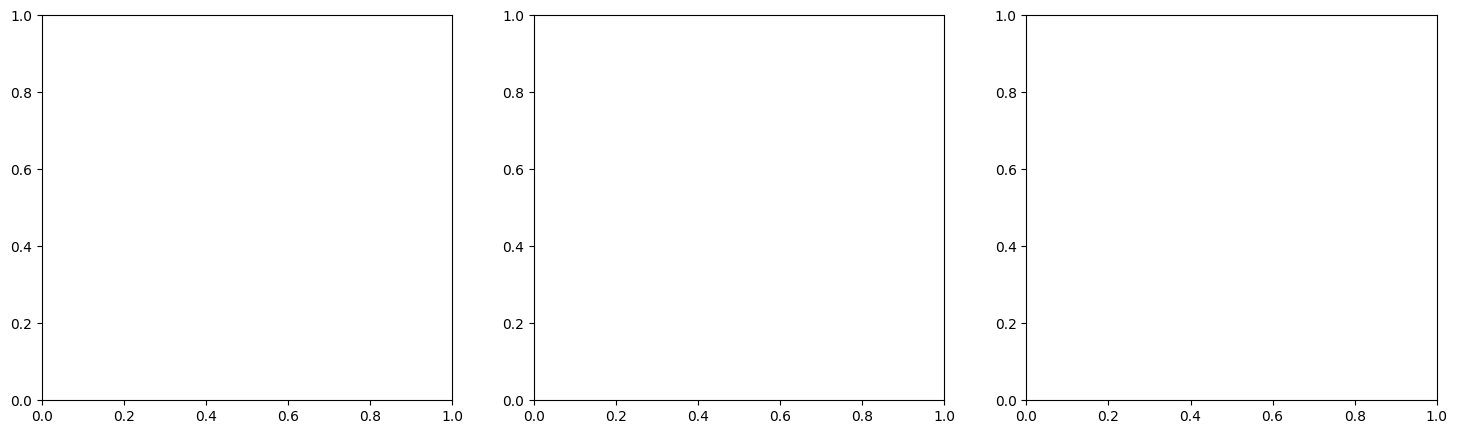

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, n in enumerate(n_values):
    power_exact = []
    power_ztest = []
    for p in p_values:
        power_exact.append(compute_power('exact', p, 0.9, n))
        power_ztest.append(compute_power('ztest', p, 0.9, n))

    axes[idx].plot(p_values, power_exact, label='Test dokładny (Binomialny)', marker='o')
    axes[idx].plot(p_values, power_ztest, label='Test asymptotyczny (Z-test)', marker='x')
    axes[idx].axhline(y=0.95, color='r', linestyle='--', linewidth=0.8)
    axes[idx].set_title(f'Moc testu (n={n})')
    axes[idx].set_xlabel('Prawdziwe p')
    axes[idx].set_ylabel('Moc testu')
    axes[idx].legend()

plt.tight_layout()
plt.show()

Na podstawie przeprowadzonych symulacji można zauważyć, że test dokładny lepiej utrzymuje założony poziom istotności przy małych próbach (np. n = 30), ale jego moc, czyli zdolność do wykrycia różnicy, jest wtedy mniejsza, szczególnie gdy prawdziwa wartość parametru jest blisko wartości z hipotezy zerowej. Test asymptotyczny w takich przypadkach częściej odrzuca hipotezę zerową, nawet gdy nie powinien, co zwiększa ryzyko błędnej decyzji. Dla większych prób (n = 100 i n = 1000) różnice między testami stają się mniejsze – oba testy osiągają wysoką moc i dają zbliżone wyniki. W praktyce oznacza to, że test dokładny jest bezpieczniejszy przy małych próbach, a przy dużych można z powodzeniem stosować test asymptotyczny, który jest szybszy w obliczeniach.

----------------------------------------------------------------------

## Zadania dodatkowe

### ZADANIE *1. 
    Wyznacz granice asymptotycznego przedziału ufności dla prawdopodobieństwa sukcesu bazując na przekształceniu logit korzystając z metody delta. Zaimplementuj metodę oraz porównaj wyniki z funkcją zaimplementowaną w wybranym pakiecie.